# Customer Segmentation Using K-Means Clustering
This project demonstrates how to segment customers based on their annual income and spending score using K-Means clustering. Customer segmentation helps businesses understand their customer base and target marketing strategies more effectively.

## Objective
The goal is to identify distinct groups of customers in a mall dataset to enable personalized marketing and business decisions.

## Dataset Description
The dataset `Mall_Customers.csv` contains the following columns:
- **CustomerID**: Unique ID for each customer
- **Gender**: Male/Female
- **Age**: Age of the customer
- **Annual Income (k$)**: Annual income in thousands of dollars
- **Spending Score (1-100)**: Score assigned by the mall based on customer behavior and spending nature
Source: [Kaggle - Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial)

### Importing Dependancies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Data Collection and Analysis

## Exploratory Data Analysis (EDA)
Let's explore the dataset to understand the distribution of key features and check for missing values.

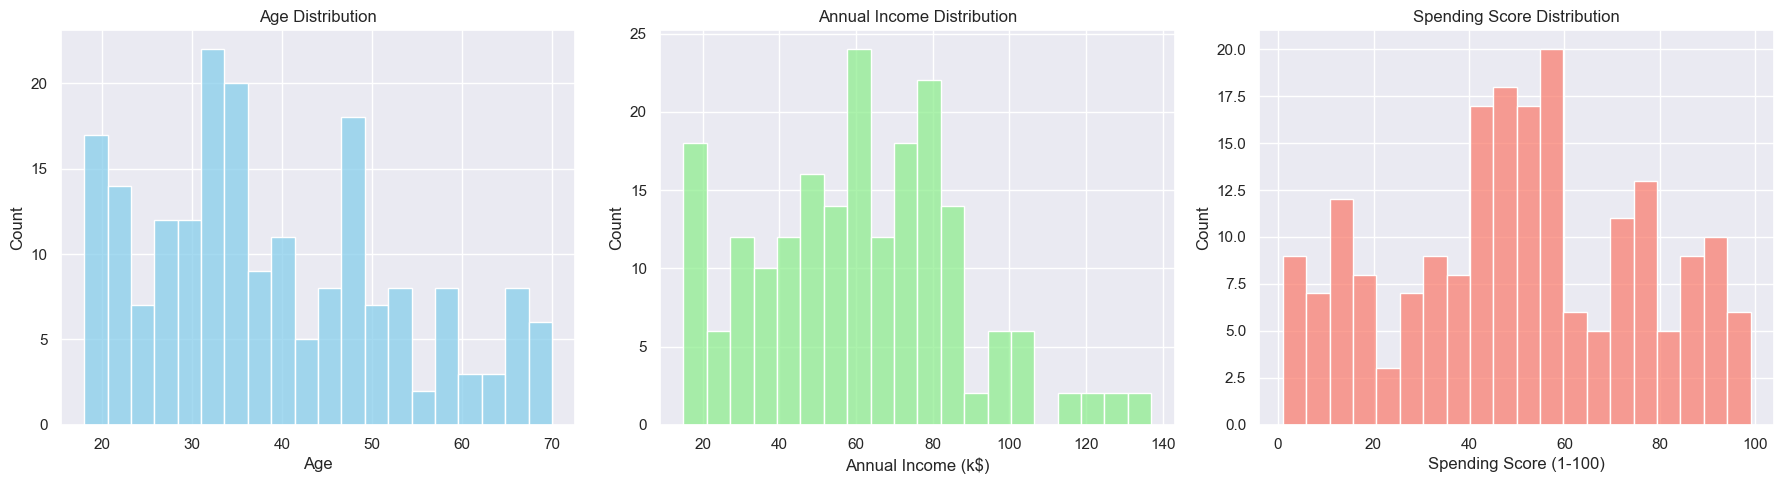

In [13]:
# Summary statistics for numerical columns
customer_data.describe()

# Visualize distributions of Age, Annual Income, and Spending Score
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(customer_data['Age'], bins=20, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')
sns.histplot(customer_data['Annual Income (k$)'], bins=20, ax=axes[1], color='lightgreen')
axes[1].set_title('Annual Income Distribution')
sns.histplot(customer_data['Spending Score (1-100)'], bins=20, ax=axes[2], color='salmon')
axes[2].set_title('Spending Score Distribution')
plt.tight_layout()
plt.show()

In [2]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [5]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Choosing the Annual Income Column & Spending Score column

In [7]:
X = customer_data.iloc[:,[3,4]].values

In [8]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### Choosing the number of clusters

## What is K-Means Clustering?
K-Means is an unsupervised machine learning algorithm used to partition data into distinct groups (clusters) based on feature similarity. It works by iteratively assigning data points to clusters and updating cluster centroids until convergence.

K-Means is suitable for customer segmentation because it can group customers with similar behaviors, helping businesses target specific segments effectively.

In [10]:
# finding within-clusters sum of squares(wcss) value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

c:\Users\name\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\name\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\name\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\name\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

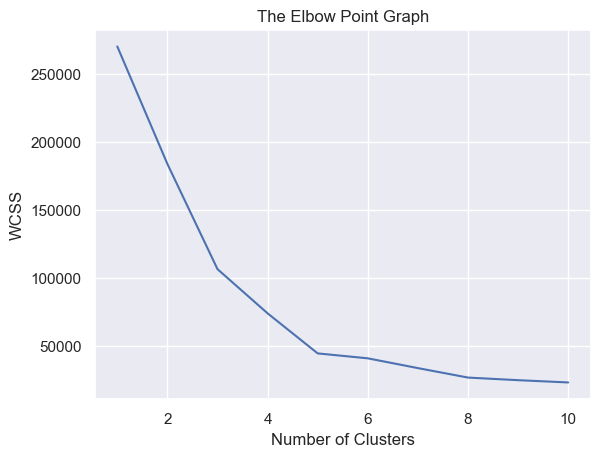

In [ ]:
# plotting an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Interpreting the Elbow Method
The elbow plot shows the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters. The 'elbow point' indicates the optimal number of clusters, where adding more clusters does not significantly reduce WCSS.

In this case, the elbow appears at 5 clusters, which is chosen for customer segmentation.

### Training the k-Means Clustering Model

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


c:\Users\name\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


5 Clusters - 0, 1, 2, 3, 4

### Visualizing all the Clusters

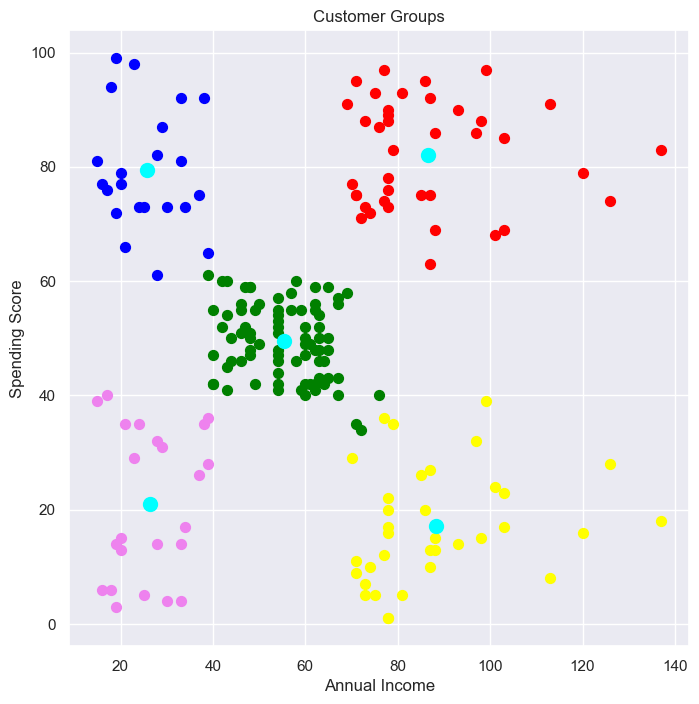

In [12]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Cluster Analysis
Let's analyze the characteristics of each cluster to gain business insights.

In [ ]:
# Add cluster labels to the original data
customer_data['Cluster'] = Y

# Summary statistics for each cluster
cluster_summary = customer_data.groupby('Cluster').agg({'Age':'mean','Annual Income (k$)':'mean','Spending Score (1-100)':'mean','CustomerID':'count'})
cluster_summary.rename(columns={'CustomerID':'Count'}, inplace=True)
cluster_summary

# Visualize cluster centers
plt.figure(figsize=(8,5))
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], s=200, color='cyan', marker='X')
plt.title('Cluster Centers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Business Insights & Recommendations
- Each cluster represents a distinct group of customers with similar income and spending patterns.
- High-income, high-spending customers can be targeted for premium products and loyalty programs.
- Low-income, low-spending customers may benefit from discounts and promotions.
- Medium-income, high-spending customers could be encouraged to increase their annual spend.

These insights can help the mall design targeted marketing strategies and improve customer satisfaction.

## Conclusion
K-Means clustering successfully segmented mall customers into distinct groups based on annual income and spending score. These segments provide actionable insights for targeted marketing and business strategy.

## References & Credits
- [Scikit-learn Documentation](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [Kaggle - Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial)
- [Seaborn Documentation](https://seaborn.pydata.org/)